[8.99976406e+04 1.14553633e+04 7.20825000e+03 1.59469800e+03
 9.65855591e+02 7.27867859e+02 3.12429688e+02 2.13020706e+02
 1.85930862e+02 1.41665222e+02 1.26216866e+02 9.10925598e+01
 8.07458954e+01 6.70547867e+01 5.96557999e+01 3.57164993e+01
 3.04805298e+01 2.52863197e+01 2.32993355e+01 1.81856804e+01
 1.34867249e+01 1.15653763e+01 9.51275444e+00 8.56998062e+00
 7.48399925e+00 6.64862919e+00 4.97490740e+00 4.05898476e+00
 3.81135702e+00 3.30715156e+00 3.28328395e+00 2.79399610e+00
 2.55531907e+00 2.30470824e+00 2.09288263e+00 1.93475890e+00
 1.87508965e+00 1.79453623e+00 1.62746227e+00 1.55585921e+00
 1.43652070e+00 1.22767818e+00 1.02778625e+00 9.71100569e-01
 8.84580135e-01 8.75629783e-01 7.98059702e-01 7.20489621e-01
 7.02588916e-01 6.60820365e-01 6.07118011e-01 5.89217305e-01
 5.65349579e-01 5.29548049e-01 5.29548049e-01 4.90763009e-01
 4.90763009e-01 4.69878793e-01 4.34077263e-01 4.07226086e-01
 3.95292222e-01 3.86341870e-01 3.74408007e-01 3.68441045e-01
 3.47556829e-01 3.386064

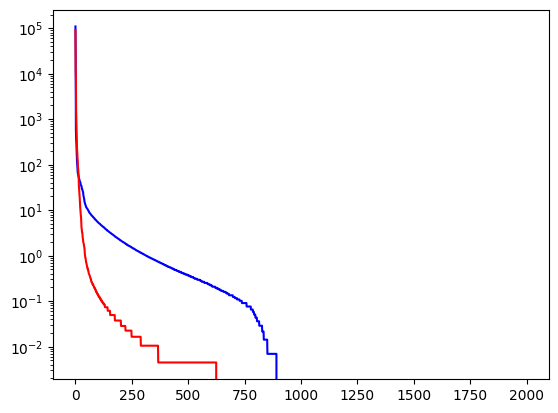

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x=np.load("/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_false_standard_gamma_1/final_spectrum_layer4_h1000_d4_n20000_lr0.005_20250124_030430_rank0.npy")
y=np.load("/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1/final_spectrum_layer4_h1000_d4_n20000_lr0.005_20250124_030313_rank0.npy")

plt.plot(x,color="blue")
plt.plot(y,color="red")
plt.yscale("log")
print(y[0:100])
#plt.xlim(0,10)
#plt.hist(x, bins=20, color='blue', edgecolor='black', alpha=0.7)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re

class SpectrumAnalyzer:
    # Color definitions
    COLORS = {
        'initial_non_shuffled': "#333A73",  # Dark blue
        'final_non_shuffled': "#9DBDFF",    # Light blue
        'initial_shuffled': "#FF6500",      # Orange
        'final_shuffled': "#FFBD73"         # Light orange
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        """Configure matplotlib plot style for scientific visualization"""
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 10,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 4,
            'ytick.major.size': 4,
            'xtick.minor.size': 2,
            'ytick.minor.size': 2,
        })

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(initial|final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'initial': {},
            'final': {}
        }
        
        for file_path in directory.glob("*.npy"):
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
        
        return spectrum_files

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load spectrum data from files"""
        spectrum_data = {
            'initial': {},
            'final': {}
        }
        
        for file_type in ['initial', 'final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                spectrum_data[file_type][layer_num] = np.load(file_path)
        
        return spectrum_data

    def plot_layer_spectra(self, 
                          non_shuffled_data: Dict[str, Dict[int, np.ndarray]], 
                          shuffled_data: Dict[str, Dict[int, np.ndarray]], 
                          layer: int,
                          hidden_size: int,
                          n_samples: int) -> plt.Figure:
        """Create plot comparing spectra for a single layer"""
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Plot non-shuffled data
        ax.plot(non_shuffled_data['initial'][layer], 
                label='Initial (Non-shuffled)', 
                color=self.COLORS['initial_non_shuffled'],
                linestyle='-')
        ax.plot(non_shuffled_data['final'][layer], 
                label='Final (Non-shuffled)', 
                color=self.COLORS['final_non_shuffled'],
                linestyle='-')
        
        # Plot shuffled data
        ax.plot(shuffled_data['initial'][layer], 
                label='Initial (Shuffled)', 
                color=self.COLORS['initial_shuffled'],
                linestyle='--')
        ax.plot(shuffled_data['final'][layer], 
                label='Final (Shuffled)', 
                color=self.COLORS['final_shuffled'],
                linestyle='--')
        
        ax.set_xlabel('Eigenvalue Index')
        ax.set_ylabel('Eigenvalue Magnitude')
        ax.set_title(f'Layer {layer} Spectrum (h={hidden_size}, n={n_samples})')
        ax.set_yscale('log')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
        ax.legend()
        
        return fig

    def analyze_and_plot_spectra(self, 
                                non_shuffled_dir: str, 
                                shuffled_dir: str, 
                                hidden_size: int,
                                n_samples: int,
                                output_dir: Optional[str] = None):
        """Main function to analyze and plot spectra"""
        # Find and load spectrum files
        non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
        shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
        
        non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
        shuffled_data = self.load_spectrum_data(shuffled_files)
        
        # Create plots for each layer
        for layer in range(1, 5):  # 4 layers
            fig = self.plot_layer_spectra(
                non_shuffled_data, 
                shuffled_data, 
                layer,
                hidden_size,
                n_samples
            )
            
            if output_dir:
                output_path = Path(output_dir) / f'spectrum_layer{layer}_h{hidden_size}_n{n_samples}.png'
                fig.savefig(output_path, dpi=300, bbox_inches='tight')
            
            plt.close(fig)

def main():
    # Example usage
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 1000  # or 400
    n_samples = 20000
    
    # Directories
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    
    # Run analysis and create plots
    analyzer.analyze_and_plot_spectra(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        n_samples=n_samples,
        output_dir=output_dir
    )

if __name__ == "__main__":
    main()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re

class SpectrumAnalyzer:
    # Color definitions
    COLORS = {
        'initial_non_shuffled': "#333A73",  # Dark blue
        'final_non_shuffled': "#9DBDFF",    # Light blue
        'initial_shuffled': "#FF6500",      # Orange
        'final_shuffled': "#FFBD73"         # Light orange
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        """Configure matplotlib plot style for scientific visualization"""
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 8,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'legend.fontsize': 6,
            'axes.titlesize': 8,
            'axes.labelsize': 7,
        })

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(initial|final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'initial': {},
            'final': {}
        }
        
        for file_path in directory.glob("*.npy"):
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
        
        return spectrum_files

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load spectrum data from files"""
        spectrum_data = {
            'initial': {},
            'final': {}
        }
        
        for file_type in ['initial', 'final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                spectrum_data[file_type][layer_num] = np.load(file_path)
        
        return spectrum_data

    def plot_grid_spectra(self, 
                         non_shuffled_dir: str, 
                         shuffled_dir: str, 
                         hidden_size: int,
                         sample_sizes: List[int],
                         output_dir: Optional[str] = None):
        """Create a 4x3 grid of spectrum plots"""
        # Create figure with subplots
        fig, axes = plt.subplots(4, 3, figsize=(12, 16))
        fig.suptitle(f'Neural Network Spectra (h={hidden_size})', fontsize=10, y=0.95)
        
        # Load and plot data for each sample size
        for col, n_samples in enumerate(sample_sizes):
            # Find and load spectrum files
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            # Plot for each layer
            for layer in range(1, 5):
                ax = axes[layer-1, col]
                
                # Plot non-shuffled data
                ax.plot(non_shuffled_data['initial'][layer], 
                       label='Initial (Non-shuffled)', 
                       color=self.COLORS['initial_non_shuffled'],
                       linestyle='-',
                       linewidth=1)
                ax.plot(non_shuffled_data['final'][layer], 
                       label='Final (Non-shuffled)', 
                       color=self.COLORS['final_non_shuffled'],
                       linestyle='-',
                       linewidth=1)
                
                # Plot shuffled data
                ax.plot(shuffled_data['initial'][layer], 
                       label='Initial (Shuffled)', 
                       color=self.COLORS['initial_shuffled'],
                       linestyle='--',
                       linewidth=1)
                ax.plot(shuffled_data['final'][layer], 
                       label='Final (Shuffled)', 
                       color=self.COLORS['final_shuffled'],
                       linestyle='--',
                       linewidth=1)
                
                # Configure subplot
                ax.set_yscale('log')
                ax.set_xlim(0,20)
                ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
                
                # Add labels
                if layer == 4:  # Bottom row
                    ax.set_xlabel('Eigenvalue Index')
                if col == 0:  # Leftmost column
                    ax.set_ylabel('Eigenvalue Magnitude')
                
                # Add titles
                if layer == 1:  # Top row
                    ax.set_title(f'n = {n_samples}')
                
                # Add layer indicator
                ax.text(0.02, 0.98, f'Layer {layer}', 
                       transform=ax.transAxes, 
                       fontsize=7,
                       verticalalignment='top')
                
                # Add legend only to the first plot
                if layer == 1 and col == 0:
                    ax.legend(bbox_to_anchor=(1.05, 1.1), 
                             loc='upper right', 
                             ncol=2)
        
        # Adjust layout
        plt.tight_layout()
        
        # Save plot if output directory is specified
        if output_dir:
            output_path = Path(output_dir) / f'spectrum_grid_h{hidden_size}.png'
            fig.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
        else:
            plt.show()

def main():
    # Example usage
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 1000  # or 400
    sample_sizes = [100, 5000, 20000]
    
    # Directories
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    
    # Create grid plot
    analyzer.plot_grid_spectra(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes,
        output_dir=output_dir
    )

if __name__ == "__main__":
    main()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re
from scipy import stats
from scipy.stats import iqr
import seaborn as sns

class SpectrumAnalyzer:
    # Color definitions
    COLORS = {
        'initial_non_shuffled': "#333A73",  # Dark blue
        'final_non_shuffled': "#9DBDFF",    # Light blue
        'initial_shuffled': "#FF6500",      # Orange
        'final_shuffled': "#FFBD73"         # Light orange
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        """Configure matplotlib plot style for scientific visualization"""
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 8,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'legend.fontsize': 6,
            'axes.titlesize': 8,
            'axes.labelsize': 7,
        })

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(initial|final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'initial': {},
            'final': {}
        }
        
        for file_path in directory.glob("*.npy"):
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
        
        return spectrum_files

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load spectrum data from files"""
        spectrum_data = {
            'initial': {},
            'final': {}
        }
        
        for file_type in ['initial', 'final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                spectrum_data[file_type][layer_num] = np.load(file_path)
        
        return spectrum_data

    def calculate_robust_bins(self, data: np.ndarray) -> Tuple[np.ndarray, float, float]:
        """Calculate robust bin edges handling outliers using IQR method"""
        # Remove zeros and take log of data
        data = data[data > 0]
        log_data = np.log10(data)
        
        # Calculate IQR and bounds
        q1 = np.percentile(log_data, 25)
        q3 = np.percentile(log_data, 75)
        iqr_val = q3 - q1
        
        # Define bounds (more conservative than typical 1.5*IQR rule)
        lower_bound = q1 - 2 * iqr_val
        upper_bound = q3 + 2 * iqr_val
        
        # Filter data within bounds
        filtered_data = log_data[(log_data >= lower_bound) & (log_data <= upper_bound)]
        
        # Calculate optimal number of bins using Freedman-Diaconis rule
        bin_width = 2 * iqr(filtered_data) / (len(filtered_data) ** (1/3))
        n_bins = int(np.ceil((filtered_data.max() - filtered_data.min()) / bin_width))
        n_bins = min(max(n_bins, 20), 50)  # Ensure reasonable number of bins
        
        # Create bin edges
        bins = np.linspace(lower_bound, upper_bound, n_bins)
        
        return bins, lower_bound, upper_bound

    def plot_density_grid(self, 
                         non_shuffled_dir: str, 
                         shuffled_dir: str, 
                         hidden_size: int,
                         sample_sizes: List[int],
                         output_dir: Optional[str] = None):
        """Create a 4x3 grid of density plots"""
        # Create figure with subplots
        fig, axes = plt.subplots(4, 3, figsize=(12, 16))
        fig.suptitle(f'Eigenvalue Distribution (h={hidden_size})', fontsize=10, y=0.95)
        
        # Load and plot data for each sample size
        for col, n_samples in enumerate(sample_sizes):
            # Find and load spectrum files
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            # Plot for each layer
            for layer in range(1, 5):
                ax = axes[layer-1, col]
                
                # Get data
                data_sets = {
                    'Initial (Non-shuffled)': non_shuffled_data['initial'][layer],
                    'Final (Non-shuffled)': non_shuffled_data['final'][layer],
                    'Initial (Shuffled)': shuffled_data['initial'][layer],
                    'Final (Shuffled)': shuffled_data['final'][layer]
                }
                
                # Calculate robust bins using combined data
                all_data = np.concatenate(list(data_sets.values()))
                bins, lower_bound, upper_bound = self.calculate_robust_bins(all_data)
                
                # Plot density for each dataset
                for label, data in data_sets.items():
                    # Filter data and convert to log scale
                    data = data[data > 0]
                    log_data = np.log10(data)
                    
                    # Get corresponding color and style
                    if 'Initial' in label and 'Non-shuffled' in label:
                        color = self.COLORS['initial_non_shuffled']
                        style = '-'
                    elif 'Final' in label and 'Non-shuffled' in label:
                        color = self.COLORS['final_non_shuffled']
                        style = '-'
                    elif 'Initial' in label and 'Shuffled' in label:
                        color = self.COLORS['initial_shuffled']
                        style = '--'
                    else:
                        color = self.COLORS['final_shuffled']
                        style = '--'
                    
                    # Plot KDE
                    kde = stats.gaussian_kde(log_data)
                    x_plot = np.linspace(lower_bound, upper_bound, 200)
                    ax.plot(x_plot, kde(x_plot), 
                           color=color, 
                           linestyle=style,
                           label=label,
                           linewidth=1)
                
                # Configure subplot
                ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
                
                # Add labels
                if layer == 4:  # Bottom row
                    ax.set_xlabel('log10(Eigenvalue)')
                if col == 0:  # Leftmost column
                    ax.set_ylabel('Density')
                
                # Add titles
                if layer == 1:  # Top row
                    ax.set_title(f'n = {n_samples}')
                
                # Add layer indicator
                ax.text(0.02, 0.98, f'Layer {layer}', 
                       transform=ax.transAxes, 
                       fontsize=7,
                       verticalalignment='top')
                
                # Add legend only to the first plot
                if layer == 1 and col == 0:
                    ax.legend(bbox_to_anchor=(1.05, 1.1), 
                             loc='upper right', 
                             ncol=1)
        
        # Adjust layout
        plt.tight_layout()
        
        # Save plot if output directory is specified
        if output_dir:
            output_path = Path(output_dir) / f'spectrum_density_h{hidden_size}.png'
            fig.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
        else:
            plt.show()

def main():
    # Example usage
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 1000  # or 400
    sample_sizes = [100, 5000, 20000]
    
    # Directories
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    
    # Create density plots
    analyzer.plot_density_grid(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes,
        output_dir=output_dir
    )

if __name__ == "__main__":
    main()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re
from scipy import stats
import seaborn as sns

class SpectrumAnalyzer:
    COLORS = {
        'initial_non_shuffled': "#333A73",  # Dark blue
        'final_non_shuffled': "#9DBDFF",    # Light blue
        'initial_shuffled': "#FF6500",      # Orange
        'final_shuffled': "#FFBD73"         # Light orange
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 8,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'legend.fontsize': 6,
            'axes.titlesize': 8,
            'axes.labelsize': 7,
        })

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(initial|final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'initial': {},
            'final': {}
        }
        
        # List all matching files
        matching_files = list(directory.glob("*.npy"))
        
        # Sort files to ensure consistent ordering
        matching_files.sort()
        
        for file_path in matching_files:
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
                
                # Print debug information
                print(f"Found {file_type} file for layer {layer_num}: {file_path.name}")
        
        return spectrum_files

    def validate_initial_spectra(self, non_shuffled_data: Dict, shuffled_data: Dict, layer: int) -> bool:
        """Validate that initial spectra match between shuffled and non-shuffled data"""
        initial_non_shuffled = non_shuffled_data['initial'][layer]
        initial_shuffled = shuffled_data['initial'][layer]
        
        # Check if shapes match
        if initial_non_shuffled.shape != initial_shuffled.shape:
            print(f"Layer {layer}: Shape mismatch in initial spectra")
            print(f"Non-shuffled shape: {initial_non_shuffled.shape}")
            print(f"Shuffled shape: {initial_shuffled.shape}")
            return False
        
        # Check if values are close
        max_diff = np.max(np.abs(initial_non_shuffled - initial_shuffled))
        if max_diff > 1e-10:
            print(f"Layer {layer}: Initial spectra differ (max diff: {max_diff})")
            return False
            
        return True

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load spectrum data from files with validation"""
        spectrum_data = {
            'initial': {},
            'final': {}
        }
        
        for file_type in ['initial', 'final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                try:
                    data = np.load(file_path)
                    spectrum_data[file_type][layer_num] = data
                    print(f"Loaded {file_type} data for layer {layer_num}")
                    print(f"Shape: {data.shape}, Range: [{data.min()}, {data.max()}]")
                except Exception as e:
                    print(f"Error loading {file_path}: {str(e)}")
                    raise
                
        return spectrum_data

    def calculate_robust_bins(self, data: np.ndarray) -> Tuple[np.ndarray, float, float]:
        """Calculate robust bin edges handling outliers using IQR method"""
        # Remove zeros and take log of data
        data = data[data > 0]
        log_data = np.log10(data)
        
        # Calculate IQR and bounds
        q1 = np.percentile(log_data, 25)
        q3 = np.percentile(log_data, 75)
        iqr_val = q3 - q1
        
        # Define bounds
        lower_bound = q1 - 2 * iqr_val
        upper_bound = q3 + 2 * iqr_val
        
        # Filter data within bounds
        filtered_data = log_data[(log_data >= lower_bound) & (log_data <= upper_bound)]
        
        # Calculate optimal number of bins
        bin_width = 2 * stats.iqr(filtered_data) / (len(filtered_data) ** (1/3))
        n_bins = int(np.ceil((filtered_data.max() - filtered_data.min()) / bin_width))
        n_bins = min(max(n_bins, 20), 50)
        
        bins = np.linspace(lower_bound, upper_bound, n_bins)
        return bins, lower_bound, upper_bound

    def plot_density_grid(self, 
                         non_shuffled_dir: str, 
                         shuffled_dir: str, 
                         hidden_size: int,
                         sample_sizes: List[int],
                         output_dir: Optional[str] = None):
        """Create a 4x3 grid of density plots with validation"""
        fig, axes = plt.subplots(4, 3, figsize=(12, 16))
        fig.suptitle(f'Eigenvalue Distribution (h={hidden_size})', fontsize=10, y=0.95)
        
        for col, n_samples in enumerate(sample_sizes):
            print(f"\nProcessing n={n_samples}")
            
            # Load data
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            for layer in range(1, 5):
                print(f"\nValidating layer {layer} for n={n_samples}")
                if not self.validate_initial_spectra(non_shuffled_data, shuffled_data, layer):
                    print(f"Warning: Initial spectra mismatch in layer {layer}")
                
                ax = axes[layer-1, col]
                data_sets = {
                    'Initial (Non-shuffled)': non_shuffled_data['initial'][layer],
                    'Final (Non-shuffled)': non_shuffled_data['final'][layer],
                    'Initial (Shuffled)': shuffled_data['initial'][layer],
                    'Final (Shuffled)': shuffled_data['final'][layer]
                }
                
                # Calculate robust bins
                all_data = np.concatenate(list(data_sets.values()))
                bins, lower_bound, upper_bound = self.calculate_robust_bins(all_data)
                
                # Plot density
                for label, data in data_sets.items():
                    data = data[data > 0]
                    log_data = np.log10(data)
                    
                    # Get style
                    if 'Initial' in label and 'Non-shuffled' in label:
                        color = self.COLORS['initial_non_shuffled']
                        style = '-'
                    elif 'Final' in label and 'Non-shuffled' in label:
                        color = self.COLORS['final_non_shuffled']
                        style = '-'
                    elif 'Initial' in label and 'Shuffled' in label:
                        color = self.COLORS['initial_shuffled']
                        style = '--'
                    else:
                        color = self.COLORS['final_shuffled']
                        style = '--'
                    
                    # Plot KDE
                    kde = stats.gaussian_kde(log_data)
                    x_plot = np.linspace(lower_bound, upper_bound, 200)
                    ax.plot(x_plot, kde(x_plot), 
                           color=color, 
                           linestyle=style,
                           label=label,
                           linewidth=1)
                
                # Configure subplot
                ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
                
                if layer == 4:
                    ax.set_xlabel('log10(Eigenvalue)')
                if col == 0:
                    ax.set_ylabel('Density')
                
                if layer == 1:
                    ax.set_title(f'n = {n_samples}')
                
                ax.text(0.02, 0.98, f'Layer {layer}', 
                       transform=ax.transAxes, 
                       fontsize=7,
                       verticalalignment='top')
                
                if layer == 1 and col == 0:
                    ax.legend(bbox_to_anchor=(1.05, 1.1), 
                             loc='upper right', 
                             ncol=1)
        
        plt.tight_layout()
        
        if output_dir:
            output_path = Path(output_dir) / f'spectrum_density_h{hidden_size}.png'
            fig.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
        else:
            plt.show()

def main():
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 1000  # or 400
    sample_sizes = [100, 5000, 20000]
    
    # Directories - UPDATE THESE PATHS
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    
    # Create density plots with validation
    analyzer.plot_density_grid(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes,
        output_dir=output_dir
    )

if __name__ == "__main__":
    main()


Processing n=100
Found final file for layer 1: final_spectrum_layer1_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 2: final_spectrum_layer2_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 3: final_spectrum_layer3_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 4: final_spectrum_layer4_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 1: initial_spectrum_layer1_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 2: initial_spectrum_layer2_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 3: initial_spectrum_layer3_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 4: initial_spectrum_layer4_h1000_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 1: final_spectrum_layer1_h1000_d4_n100_lr0.005_20250124_030519_rank0.npy
Found final file for layer 2: final_spectrum_layer2_h1000_d4_n100_

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re
from scipy import stats
import seaborn as sns

class SpectrumAnalyzer:
    COLORS = {
        'initial_non_shuffled': "#9DBDFF",  # Dark blue
        'final_non_shuffled': "#333A73",    # Light blue #333A73
        'initial_shuffled': "#FFBD73",      # Orange
        'final_shuffled': "#FF6500"         # Light orange FF6500
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 8,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'legend.fontsize': 6,
            'axes.titlesize': 8,
            'axes.labelsize': 7,
        })

    def normalize_spectrum(self, eigenvalues: np.ndarray) -> np.ndarray:
        """Normalize the spectrum by dividing by the sum of eigenvalues"""
        # Remove any negative values and zeros
        eigenvalues = np.maximum(eigenvalues, 1e-10)
        return eigenvalues / np.sum(eigenvalues)

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(initial|final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'initial': {},
            'final': {}
        }
        
        matching_files = list(directory.glob("*.npy"))
        matching_files.sort()
        
        for file_path in matching_files:
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
                print(f"Found {file_type} file for layer {layer_num}: {file_path.name}")
        
        return spectrum_files

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load and normalize spectrum data"""
        spectrum_data = {
            'initial': {},
            'final': {}
        }
        
        for file_type in ['initial', 'final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                try:
                    data = np.load(file_path)
                    # Normalize the spectrum
                    normalized_data = self.normalize_spectrum(data)
                    spectrum_data[file_type][layer_num] = normalized_data
                    print(f"Loaded and normalized {file_type} data for layer {layer_num}")
                    print(f"Original range: [{data.min()}, {data.max()}]")
                    print(f"Normalized range: [{normalized_data.min()}, {normalized_data.max()}]")
                except Exception as e:
                    print(f"Error loading {file_path}: {str(e)}")
                    raise
                
        return spectrum_data

    def calculate_robust_bins(self, data: np.ndarray) -> Tuple[np.ndarray, float, float]:
        """Calculate robust bin edges handling outliers using IQR method"""
        # Remove zeros and take log of data
        data = data[data > 0]
        log_data = np.log10(data)
        
        # Calculate IQR and bounds
        q1 = np.percentile(log_data, 25)
        q3 = np.percentile(log_data, 75)
        iqr_val = q3 - q1
        
        # Define bounds
        lower_bound = q1 - 2 * iqr_val
        upper_bound = q3 + 2 * iqr_val
        
        # Filter data within bounds
        filtered_data = log_data[(log_data >= lower_bound) & (log_data <= upper_bound)]
        
        # Calculate optimal number of bins
        bin_width = 2 * stats.iqr(filtered_data) / (len(filtered_data) ** (1/3))
        n_bins = int(np.ceil((filtered_data.max() - filtered_data.min()) / bin_width))
        n_bins = min(max(n_bins, 20), 50)
        
        bins = np.linspace(lower_bound, upper_bound, n_bins)
        return bins, lower_bound, upper_bound

    def plot_density_grid(self, 
                         non_shuffled_dir: str, 
                         shuffled_dir: str, 
                         hidden_size: int,
                         sample_sizes: List[int],
                         output_dir: Optional[str] = None):
        """Create a 4x3 grid of density plots with normalized spectra"""
        fig, axes = plt.subplots(4, 3, figsize=(12, 16))
        fig.suptitle(f'Normalized Eigenvalue Distribution (h={hidden_size})', fontsize=10, y=0.95)
        
        for col, n_samples in enumerate(sample_sizes):
            print(f"\nProcessing n={n_samples}")
            
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            for layer in range(1, 5):
                ax = axes[layer-1, col]
                data_sets = {
                    'Initial (Non-shuffled)': non_shuffled_data['initial'][layer],
                    'Final (Non-shuffled)': non_shuffled_data['final'][layer],
                    'Initial (Shuffled)': shuffled_data['initial'][layer],
                    'Final (Shuffled)': shuffled_data['final'][layer]
                }
                
                # Calculate robust bins
                all_data = np.concatenate(list(data_sets.values()))
                bins, lower_bound, upper_bound = self.calculate_robust_bins(all_data)
                
                # Plot density
                for label, data in data_sets.items():
                    data = data[data > 0]
                    log_data = np.log10(data)
                    
                    # Get style
                    if 'Initial' in label and 'Non-shuffled' in label:
                        color = self.COLORS['initial_non_shuffled']
                        style = '--'
                    elif 'Final' in label and 'Non-shuffled' in label:
                        color = self.COLORS['final_non_shuffled']
                        style = '-'
                    elif 'Initial' in label and 'Shuffled' in label:
                        color = self.COLORS['initial_shuffled']
                        style = '--'
                    else:
                        color = self.COLORS['final_shuffled']
                        style = '-'
                    
                    # Plot KDE
                    kde = stats.gaussian_kde(log_data)
                    x_plot = np.linspace(lower_bound, upper_bound, 200)
                    ax.plot(x_plot, kde(x_plot), 
                           color=color, 
                           linestyle=style,
                           label=label,
                           linewidth=1)
                
                # Configure subplot
                ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
                
                if layer == 4:
                    ax.set_xlabel('log10(Normalized Eigenvalue)')
                if col == 0:
                    ax.set_ylabel('Density')
                
                if layer == 1:
                    ax.set_title(f'n = {n_samples}')
                
                ax.text(0.02, 0.98, f'Layer {layer}', 
                       transform=ax.transAxes, 
                       fontsize=7,
                       verticalalignment='top')
                
                if layer == 1 and col == 0:
                    ax.legend(bbox_to_anchor=(1.05, 1.1), 
                             loc='upper right', 
                             ncol=1)
        
        plt.tight_layout()
        
        if output_dir:
            output_path = Path(output_dir) / f'normalized_spectrum_density_h{hidden_size}_mup.png'
            fig.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
        else:
            plt.show()

def main():
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 400  # or 400
    sample_sizes = [100, 5000, 20000]
    
    # Directories - UPDATE THESE PATHS
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    
    # Create density plots with normalized spectra
    analyzer.plot_density_grid(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes,
        output_dir=output_dir
    )

if __name__ == "__main__":
    main()


Processing n=100
Found final file for layer 1: final_spectrum_layer1_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 2: final_spectrum_layer2_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 3: final_spectrum_layer3_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 4: final_spectrum_layer4_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 1: initial_spectrum_layer1_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 2: initial_spectrum_layer2_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 3: initial_spectrum_layer3_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found initial file for layer 4: initial_spectrum_layer4_h400_d4_n100_lr0.005_20250124_030313_rank0.npy
Found final file for layer 1: final_spectrum_layer1_h400_d4_n100_lr0.005_20250124_030519_rank0.npy
Found final file for layer 2: final_spectrum_layer2_h400_d4_n100_lr0.005_20

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re
from scipy import stats
import seaborn as sns

class SpectrumAnalyzer:
    COLORS = {
        'initial_non_shuffled': "#9DBDFF",  # Light blue
        'final_non_shuffled': "#333A73",    # Dark blue
        'initial_shuffled': "#FFBD73",      # Light orange
        'final_shuffled': "#FF6500"         # Dark orange
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 8,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'legend.fontsize': 6,
            'axes.titlesize': 8,
            'axes.labelsize': 7,
        })

    def normalize_spectrum(self, eigenvalues: np.ndarray) -> np.ndarray:
        """Normalize the spectrum by dividing by the sum of eigenvalues"""
        eigenvalues = np.maximum(eigenvalues, 1e-10)
        return eigenvalues / np.sum(eigenvalues)

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(initial|final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'initial': {},
            'final': {}
        }
        
        matching_files = list(directory.glob("*.npy"))
        matching_files.sort()
        
        for file_path in matching_files:
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
        
        return spectrum_files

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load and normalize spectrum data"""
        spectrum_data = {
            'initial': {},
            'final': {}
        }
        
        for file_type in ['initial', 'final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                try:
                    data = np.load(file_path)
                    normalized_data = self.normalize_spectrum(data)
                    spectrum_data[file_type][layer_num] = normalized_data
                except Exception as e:
                    print(f"Error loading {file_path}: {str(e)}")
                    raise
                
        return spectrum_data

    def plot_density_grid(self, 
                         non_shuffled_dir: str, 
                         shuffled_dir: str, 
                         hidden_size: int,
                         sample_sizes: List[int],
                         output_dir: Optional[str] = None):
        """Create a 4x3 grid of density plots with normalized spectra and consistent binning"""
        fig, axes = plt.subplots(4, 3, figsize=(12, 16))
        fig.suptitle(f'Normalized Eigenvalue Distribution mup (h={hidden_size})', fontsize=10, y=0.95)
        
        # Store global min/max for consistent plotting
        global_lower_bound = float('inf')
        global_upper_bound = float('-inf')
        
        # First pass: load all data and determine global bounds
        all_data_by_sample_layer = {}
        for n_samples in sample_sizes:
            all_data_by_sample_layer[n_samples] = {}
            
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            for layer in range(1, 5):
                data_sets = {
                    'Initial (Non-shuffled)': non_shuffled_data['initial'][layer],
                    'Final (Non-shuffled)': non_shuffled_data['final'][layer],
                    'Initial (Shuffled)': shuffled_data['initial'][layer],
                    'Final (Shuffled)': shuffled_data['final'][layer]
                }
                
                all_data_by_sample_layer[n_samples][layer] = data_sets
                
                # Calculate global bounds
                for data in data_sets.values():
                    valid_data = data[data > 0]
                    if len(valid_data) > 0:
                        log_data = np.log10(valid_data)
                        global_lower_bound = min(global_lower_bound, np.percentile(log_data, 1))
                        global_upper_bound = max(global_upper_bound, np.percentile(log_data, 99))
        
        # Add some padding to the bounds
        bound_range = global_upper_bound - global_lower_bound
        global_lower_bound -= 0.1 * bound_range
        global_upper_bound += 0.1 * bound_range
        
        # Second pass: create plots using consistent bounds
        for col, n_samples in enumerate(sample_sizes):
            for layer in range(1, 5):
                ax = axes[layer-1, col]
                data_sets = all_data_by_sample_layer[n_samples][layer]
                
                for label, data in data_sets.items():
                    data = data[data > 0]
                    log_data = np.log10(data)
                    
                    # Get style - use dashed lines for initial states
                    if 'Initial' in label and 'Non-shuffled' in label:
                        color = self.COLORS['initial_non_shuffled']
                        style = '--'
                    elif 'Final' in label and 'Non-shuffled' in label:
                        color = self.COLORS['final_non_shuffled']
                        style = '-'
                    elif 'Initial' in label and 'Shuffled' in label:
                        color = self.COLORS['initial_shuffled']
                        style = '--'
                    else:
                        color = self.COLORS['final_shuffled']
                        style = '-'
                    
                    # Plot KDE with consistent bounds
                    kde = stats.gaussian_kde(log_data)
                    x_plot = np.linspace(global_lower_bound, global_upper_bound, 200)
                    ax.plot(x_plot, kde(x_plot), 
                           color=color, 
                           linestyle=style,
                           label=label,
                           linewidth=1)
                
                # Configure subplot
                ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
                ax.set_xlim(global_lower_bound, global_upper_bound)
                
                if layer == 4:
                    ax.set_xlabel('log10(Normalized Eigenvalue)')
                if col == 0:
                    ax.set_ylabel('Density')
                
                if layer == 1:
                    ax.set_title(f'n = {n_samples}')
                
                ax.text(0.02, 0.98, f'Layer {layer}', 
                       transform=ax.transAxes, 
                       fontsize=7,
                       verticalalignment='top')
                
                if layer == 1 and col == 0:
                    ax.legend(bbox_to_anchor=(1.05, 1.1), 
                             loc='upper right', 
                             ncol=1)
        
        plt.tight_layout()
        
        if output_dir:
            output_path = Path(output_dir) / f'normalized_spectrum_density_h{hidden_size}_mup.png'
            fig.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
        else:
            plt.show()

def main():
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 400
    sample_sizes = [100, 5000, 20000]
    
    # Directories
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    
    # Create density plots
    analyzer.plot_density_grid(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes,
        output_dir=output_dir
    )

if __name__ == "__main__":
    main()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re

class SpectrumAnalyzer:
    COLORS = {
        'initial_non_shuffled': "#9DBDFF",  # Light blue
        'final_non_shuffled': "#333A73",    # Dark blue
        'initial_shuffled': "#FFBD73",      # Light orange
        'final_shuffled': "#FF6500"         # Dark orange
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 8,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'legend.fontsize': 6,
            'axes.titlesize': 8,
            'axes.labelsize': 7,
        })

    def normalize_spectrum(self, eigenvalues: np.ndarray) -> np.ndarray:
        """Normalize the spectrum by dividing by the sum of eigenvalues"""
        eigenvalues = np.maximum(eigenvalues, 1e-10)
        return eigenvalues / np.sum(eigenvalues)

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(initial|final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'initial': {},
            'final': {}
        }
        
        matching_files = list(directory.glob("*.npy"))
        matching_files.sort()
        
        for file_path in matching_files:
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
        
        return spectrum_files

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load and normalize spectrum data"""
        spectrum_data = {
            'initial': {},
            'final': {}
        }
        
        for file_type in ['initial', 'final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                try:
                    data = np.load(file_path)
                    normalized_data = self.normalize_spectrum(data)
                    spectrum_data[file_type][layer_num] = normalized_data
                    print(f"Loaded {file_type} data for layer {layer_num}")
                    print(f"Range: [{data.min()}, {data.max()}]")
                except Exception as e:
                    print(f"Error loading {file_path}: {str(e)}")
                    raise
                
        return spectrum_data

    def plot_histogram_grid(self, 
                          non_shuffled_dir: str, 
                          shuffled_dir: str, 
                          hidden_size: int,
                          sample_sizes: List[int],
                          output_dir: Optional[str] = None):
        """Create a 4x3 grid of histograms with log-spaced bins"""
        fig, axes = plt.subplots(4, 3, figsize=(12, 16))
        fig.suptitle(f'Eigenvalue Distribution (h={hidden_size})', fontsize=10, y=0.95)
        
        # First pass: find global range for consistent binning
        global_min = float('inf')
        global_max = float('-inf')
        all_data_by_sample_layer = {}
        
        for n_samples in sample_sizes:
            all_data_by_sample_layer[n_samples] = {}
            
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            for layer in range(1, 5):
                data_sets = {
                    'Initial (Non-shuffled)': non_shuffled_data['initial'][layer],
                    'Final (Non-shuffled)': non_shuffled_data['final'][layer],
                    'Initial (Shuffled)': shuffled_data['initial'][layer],
                    'Final (Shuffled)': shuffled_data['final'][layer]
                }
                
                all_data_by_sample_layer[n_samples][layer] = data_sets
                
                # Update global min/max
                for data in data_sets.values():
                    valid_data = data[data > 0]
                    if len(valid_data) > 0:
                        global_min = min(global_min, np.min(valid_data))
                        global_max = max(global_max, np.max(valid_data))
        
        # Create log-spaced bins
        log_bins = np.logspace(np.log10(global_min), np.log10(global_max), 50)
        
        # Second pass: create histograms
        for col, n_samples in enumerate(sample_sizes):
            for layer in range(1, 5):
                ax = axes[layer-1, col]
                data_sets = all_data_by_sample_layer[n_samples][layer]
                
                # Plot histograms
                for label, data in data_sets.items():
                    valid_data = data[data > 0]
                    
                    # Get style
                    if 'Initial' in label and 'Non-shuffled' in label:
                        color = self.COLORS['initial_non_shuffled']
                        style = '--'
                        alpha = 0.6
                    elif 'Final' in label and 'Non-shuffled' in label:
                        color = self.COLORS['final_non_shuffled']
                        style = '-'
                        alpha = 0.6
                    elif 'Initial' in label and 'Shuffled' in label:
                        color = self.COLORS['initial_shuffled']
                        style = '--'
                        alpha = 0.6
                    else:
                        color = self.COLORS['final_shuffled']
                        style = '-'
                        alpha = 0.6
                    
                    # Plot histogram
                    ax.hist(valid_data, bins=log_bins, alpha=alpha, color=color,
                           histtype='step', linestyle=style, label=label)
                    
                    # Add scatter points for values above 95th percentile
                    threshold = np.percentile(valid_data, 95)
                    outliers = valid_data[valid_data > threshold]
                    if len(outliers) > 0:
                        ax.scatter(outliers, np.zeros_like(outliers) + 0.1, 
                                 color=color, marker='|', alpha=0.8, s=20)
                
                # Configure subplot
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
                
                if layer == 4:
                    ax.set_xlabel('Eigenvalue (log scale)')
                if col == 0:
                    ax.set_ylabel('Count (log scale)')
                
                if layer == 1:
                    ax.set_title(f'n = {n_samples}')
                
                ax.text(0.02, 0.98, f'Layer {layer}', 
                       transform=ax.transAxes, 
                       fontsize=7,
                       verticalalignment='top')
                
                if layer == 1 and col == 0:
                    ax.legend(bbox_to_anchor=(1.05, 1.1), 
                             loc='upper right', 
                             ncol=1)
        
        plt.tight_layout()
        
        if output_dir:
            output_path = Path(output_dir) / f'spectrum_histogram_h{hidden_size}_mup_full.png'
            fig.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
        else:
            plt.show()

def main():
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 1000
    sample_sizes = [100, 5000, 20000]
    
    # Directories
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    
    # Create histogram plots
    analyzer.plot_histogram_grid(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes,
        output_dir=output_dir
    )

if __name__ == "__main__":
    main()

Loaded initial data for layer 1
Range: [26.704055786132812, 16239.16015625]
Loaded initial data for layer 2
Range: [16.56647300720215, 12762.2578125]
Loaded initial data for layer 3
Range: [7.585597515106201, 8289.00390625]
Loaded initial data for layer 4
Range: [3.2796428203582764, 4536.30908203125]
Loaded final data for layer 1
Range: [0.015681272372603416, 572.2890625]
Loaded final data for layer 2
Range: [4.099897705600597e-05, 7558.2158203125]
Loaded final data for layer 3
Range: [0.0006374496151693165, 6825.47314453125]
Loaded final data for layer 4
Range: [0.00064256158657372, 4268.859375]
Loaded initial data for layer 1
Range: [1.6836543083190918, 978.6885986328125]
Loaded initial data for layer 2
Range: [1.0550689697265625, 766.2154541015625]
Loaded initial data for layer 3
Range: [0.4559951424598694, 481.7603454589844]
Loaded initial data for layer 4
Range: [0.18650496006011963, 281.6336669921875]
Loaded final data for layer 1
Range: [1.7347071170806885, 1049.3603515625]
Load

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import re
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon
import numpy as np
from scipy.stats import wasserstein_distance, ks_2samp


class SpectrumAnalyzer:
    COLORS = {
        'final_non_shuffled': "#FF0000",    # Dark blue   #FF0000',      # Red 100: '#00FF00'
        'final_shuffled': "#00FF00"         # Dark orange
    }
    
    def __init__(self):
        self.setup_plot_style()
    
    @staticmethod
    def setup_plot_style():
        plt.style.use('default')
        plt.rcParams.update({
            'font.family': 'serif',
            'font.size': 8,
            'axes.linewidth': 0.5,
            'axes.grid': True,
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'grid.alpha': 0.5,
            'lines.linewidth': 1.5,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'legend.fontsize': 6,
            'axes.titlesize': 8,
            'axes.labelsize': 7,
        })


    

    def calculate_normalized_metrics(self, non_shuffled_dir: str, shuffled_dir: str, 
                                hidden_size: int, sample_sizes: List[int]):
        """Calculate normalized distribution similarity metrics"""
        metrics = {}
        
        for n_samples in sample_sizes:
            metrics[n_samples] = {}
            
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            for layer in range(1, 5):
                non_shuffled = non_shuffled_data['final'][layer]
                shuffled = shuffled_data['final'][layer]
                
                # Filter out non-positive values
                valid_non_shuffled = non_shuffled[non_shuffled > 0]
                valid_shuffled = shuffled[shuffled > 0]
                
                # Normalize the data
                norm_non_shuffled = valid_non_shuffled / valid_non_shuffled.max()
                norm_shuffled = valid_shuffled / valid_shuffled.max()
                
                # Calculate normalized Wasserstein distance
                norm_w_distance = wasserstein_distance(norm_non_shuffled, norm_shuffled)
                
                # Calculate Jensen-Shannon divergence using histograms
                # Use same bins for both distributions
                bins = np.logspace(np.log10(min(norm_non_shuffled.min(), norm_shuffled.min())),
                                np.log10(1.0), 50)
                
                hist1, _ = np.histogram(norm_non_shuffled, bins=bins, density=True)
                hist2, _ = np.histogram(norm_shuffled, bins=bins, density=True)
                
                # Add small constant to avoid zero probabilities
                hist1 = hist1 + 1e-10
                hist2 = hist2 + 1e-10
                
                # Normalize histograms to get probability distributions
                hist1 = hist1 / hist1.sum()
                hist2 = hist2 / hist2.sum()
                
                js_divergence = jensenshannon(hist1, hist2)
                
                metrics[n_samples][layer] = {
                    'normalized_wasserstein': norm_w_distance,
                    'jensen_shannon': js_divergence
                }
                
                print(f"\nn={n_samples}, Layer {layer}:")
                print(f"  Normalized Wasserstein = {norm_w_distance:.6f}")
                print(f"  Jensen-Shannon divergence = {js_divergence:.6f}")
                
                # Also print relative scale of distributions for context
                print(f"  Original range non-shuffled: [{valid_non_shuffled.min():.2e}, {valid_non_shuffled.max():.2e}]")
                print(f"  Original range shuffled: [{valid_shuffled.min():.2e}, {valid_shuffled.max():.2e}]")
        
        return metrics

    def find_spectrum_files(self, directory: str, hidden_size: int, n_samples: int) -> Dict[str, Dict[int, str]]:
        """Find all relevant spectrum files in the directory"""
        directory = Path(directory)
        pattern = f"(final)_spectrum_layer(\d+)_h{hidden_size}_d4_n{n_samples}_lr0.005_.*\.npy$"
        
        spectrum_files = {
            'final': {}
        }
        
        matching_files = list(directory.glob("*.npy"))
        matching_files.sort()
        
        for file_path in matching_files:
            match = re.match(pattern, file_path.name)
            if match:
                file_type, layer_num = match.groups()
                layer_num = int(layer_num)
                spectrum_files[file_type][layer_num] = str(file_path)
        
        return spectrum_files

    def load_spectrum_data(self, spectrum_files: Dict[str, Dict[int, str]]) -> Dict[str, Dict[int, np.ndarray]]:
        """Load spectrum data without normalization"""
        spectrum_data = {
            'final': {}
        }
        
        for file_type in ['final']:
            for layer_num, file_path in spectrum_files[file_type].items():
                try:
                    data = np.load(file_path)
                    spectrum_data[file_type][layer_num] = data
                    print(f"Loaded {file_type} data for layer {layer_num}")
                    print(f"Range: [{data.min()}, {data.max()}]")
                except Exception as e:
                    print(f"Error loading {file_path}: {str(e)}")
                    raise
                
        return spectrum_data

    def plot_histogram_grid(self, 
                          non_shuffled_dir: str, 
                          shuffled_dir: str, 
                          hidden_size: int,
                          sample_sizes: List[int],
                          output_dir: Optional[str] = None):
        """Create a 4x3 grid of histograms with log-spaced bins"""
        fig, axes = plt.subplots(4, 3, figsize=(10, 7.5))
        #fig.suptitle(f'Eigenvalue Distribution mup (h={hidden_size})', fontsize=10, y=0.95)  ####title
        
        # First pass: find global range for consistent binning
        global_min = float('inf')
        global_max = float('-inf')
        all_data_by_sample_layer = {}
        
        for n_samples in sample_sizes:
            all_data_by_sample_layer[n_samples] = {}
            
            non_shuffled_files = self.find_spectrum_files(non_shuffled_dir, hidden_size, n_samples)
            shuffled_files = self.find_spectrum_files(shuffled_dir, hidden_size, n_samples)
            
            non_shuffled_data = self.load_spectrum_data(non_shuffled_files)
            shuffled_data = self.load_spectrum_data(shuffled_files)
            
            for layer in range(1, 5):
                data_sets = {
                    'Final (Non-shuffled)': non_shuffled_data['final'][layer],
                    'Final (Shuffled)': shuffled_data['final'][layer]
                }
                
                all_data_by_sample_layer[n_samples][layer] = data_sets
                
                # Update global min/max
                for data in data_sets.values():
                    valid_data = data[data > 0]
                    if len(valid_data) > 0:
                        global_min = min(global_min, np.min(valid_data))
                        global_max = max(global_max, np.max(valid_data))
        
        # Create log-spaced bins
        log_bins = np.logspace(np.log10(global_min), np.log10(global_max), 50)
        
        # Second pass: create histograms
        for col, n_samples in enumerate(sample_sizes):
            for layer in range(1, 5):
                ax = axes[layer-1, col]
                data_sets = all_data_by_sample_layer[n_samples][layer]
                
                # Plot histograms in specific order (shuffled on top)
                # First plot non-shuffled
                data = data_sets['Final (Non-shuffled)']
                valid_data = data[data > 0]
                ax.hist(valid_data, bins=log_bins, alpha=0.7,
                       color=self.COLORS['final_non_shuffled'],
                       histtype='step', linestyle='-', 
                       label='final (non-shuffled)')
                
                # Then plot shuffled
                data = data_sets['Final (Shuffled)']
                valid_data = data[data > 0]
                ax.hist(valid_data, bins=log_bins, alpha=0.7,
                       color=self.COLORS['final_shuffled'],
                       histtype='step', linestyle='--',
                       label='final (shuffled)')
                
                # Configure subplot
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
                
                if layer == 4:
                    ax.set_xlabel('Eigenvalue (log scale)')
                if col == 0:
                    ax.set_ylabel('Count (log scale)')
                
                if layer == 1:
                    ax.set_title(f'm = {n_samples}')
                
                ax.text(0.02, 0.98, f'Layer {layer}', 
                       transform=ax.transAxes, 
                       fontsize=7,
                       verticalalignment='top')
                
                if layer == 1 and col == 0:
                    ax.legend(bbox_to_anchor=(0.99, 1.0), 
                             loc='upper right', 
                             ncol=1)
        
        plt.tight_layout()
        
        if output_dir:
            output_path = Path(output_dir) / f'11_spectrum_histogram_h{hidden_size}_mup.pdf'
            fig.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
        else:
            plt.show()
def main():
    analyzer = SpectrumAnalyzer()
    
    # Parameters
    hidden_size = 1000
    sample_sizes = [100, 5000, 20000]
    
    non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_false_mup_gamma_1"
    shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_mup_gamma_1"
    output_dir = "/mnt/users/goringn/NNs_vs_Kernels/figures"
    #non_shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_false_standard_gamma_1"
    #shuffled_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/results/msp_spectrum_spectrum_true_standard_gamma_1"
    
    
    # Create histogram plots
    analyzer.plot_histogram_grid(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes,
        output_dir=output_dir
    )
    
    # Calculate metrics - using the correct method name
    metrics = analyzer.calculate_normalized_metrics(
        non_shuffled_dir=non_shuffled_dir,
        shuffled_dir=shuffled_dir,
        hidden_size=hidden_size,
        sample_sizes=sample_sizes
    )
    
    return metrics

if __name__ == "__main__":
    main()

Loaded final data for layer 1
Range: [0.0072749098762869835, 628.331298828125]
Loaded final data for layer 2
Range: [-0.0003644611861091107, 8910.283203125]
Loaded final data for layer 3
Range: [0.0001717738778097555, 8076.0947265625]
Loaded final data for layer 4
Range: [0.0001828558451961726, 5074.0810546875]
Loaded final data for layer 1
Range: [0.015681272372603416, 572.2890625]
Loaded final data for layer 2
Range: [4.099897705600597e-05, 7558.2158203125]
Loaded final data for layer 3
Range: [0.0006374496151693165, 6825.47314453125]
Loaded final data for layer 4
Range: [0.00064256158657372, 4268.859375]
Loaded final data for layer 1
Range: [0.00016209849854931235, 26025.365234375]
Loaded final data for layer 2
Range: [0.003073573810979724, 91565.8671875]
Loaded final data for layer 3
Range: [0.002429448300972581, 101250.609375]
Loaded final data for layer 4
Range: [0.00042731105349957943, 112001.0703125]
Loaded final data for layer 1
Range: [-0.0003472637035883963, 22693.931640625]